In [8]:
import os

import neat
import visualize

from backtest import NEAT_strategy, backtest

import yfinance as yf

import pandas as pd



In [9]:
backtesting_data = yf.download('AAPL', interval='15m', period='60d')
backtesting_data.index = pd.to_datetime(backtesting_data.index)

[*********************100%***********************]  1 of 1 completed


In [10]:
from tool import run, test, evaluate


 ****** Running generation 0 ****** 

Population's average fitness: -30.01959 stdev: 40.73267
Best fitness: 0.00000 - size: (2, 8) - species 1 - id 2
Average adjusted fitness: 0.683
Mean genetic distance 1.461, standard deviation 0.331
Population of 40 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    40      0.0    0.683     0
Total extinctions: 0
Generation time: 15.285 sec

 ****** Running generation 1 ****** 

Population's average fitness: -19.98195 stdev: 36.33129
Best fitness: 0.00000 - size: (2, 8) - species 1 - id 2
Average adjusted fitness: 0.789
Mean genetic distance 1.421, standard deviation 0.489
Population of 40 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    40      0.0    0.789     1
Total extinctions: 0
Generation time: 5.115 sec (10.200 average)

 ****** Running generation 2 ****** 

Population's average fitness: -2.23036 stde

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\bokeh\models\formatters.py:399: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first prodvided: '%d %b' 
  warnings.warn(f"DatetimeFormatter scales now only accept a single format. Using the first prodvided: {fmt[0]!r} ")
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\bokeh\models\formatters.py:399: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first prodvided: '%m/%Y' 
  warnings.warn(f"DatetimeFormatter scales now only accept a single format. Using the first prodvided: {fmt[0]!r} ")


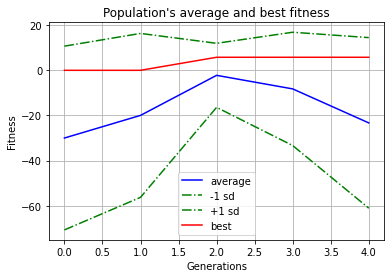

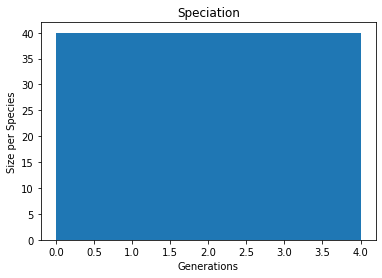

In [13]:
eval = evaluate(backtesting_data)
run('config-feedforward', eval, max_generation=5)